In [1]:
import torch
from diffusers import DiffusionPipeline
from pipeline_waifu import WaifuPipeline

pipe_id = "/home/recoilme/models/waifu-2b"
variant = "fp16"


pipe = WaifuPipeline.from_pretrained(
    pipe_id, 
    variant=variant,
)
#print(pipe)
pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

WaifuPipeline {
  "_class_name": "WaifuPipeline",
  "_diffusers_version": "0.33.0.dev0",
  "_name_or_path": "/home/recoilme/models/waifu-2b",
  "scheduler": [
    "diffusers",
    "FlowMatchEulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "XLMRobertaModel"
  ],
  "tokenizer": [
    "transformers",
    "XLMRobertaTokenizerFast"
  ],
  "transformer": [
    "diffusers",
    "SanaTransformer2DModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [2]:
def txt_embeds(prompt):
    max_length = 512
    select_index = [0] + list(range(-max_length + 1, 0))
    
    text_inputs = pipe.tokenizer(
        prompt,
        padding="max_length",
        max_length=max_length,
        truncation=True,
        add_special_tokens=True,
        return_tensors="pt",
    )
    text_input_ids = text_inputs.input_ids
    prompt_attention_mask = text_inputs.attention_mask
    device = "cuda"
    pipe.text_encoder.to(device)
    prompt_attention_mask = prompt_attention_mask.to(device)
    
    prompt_embeds = pipe.text_encoder(input_ids=text_input_ids.to(device), attention_mask=prompt_attention_mask)[0][:, select_index]
    prompt_attention_mask = prompt_attention_mask[:, select_index]

    return prompt_embeds, prompt_attention_mask

  0%|          | 0/20 [00:00<?, ?it/s]

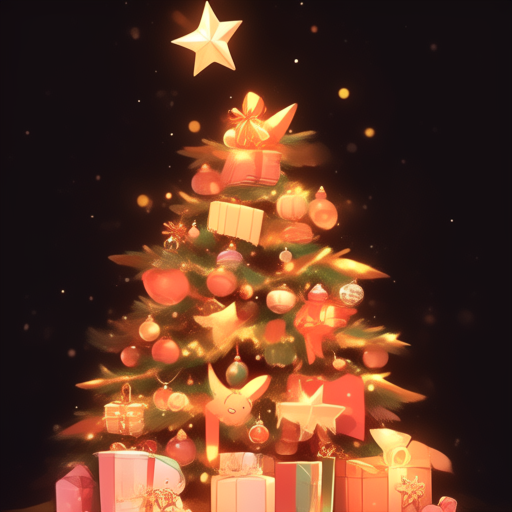

нарядная новогодняя елка, красивые игрушки, звезда сверху, огоньки, на тёмном фоне


In [3]:
prompt = '1girl, solo, animal ears, bow, teeth, jacket, tail, open mouth, brown hair, orange background, bowtie, orange nails, simple background, cat ears, orange eyes, blue bow, animal ear fluff, cat tail, looking at viewer, upper body, shirt, school uniform, hood, striped bow, striped, white shirt, black jacket, blue bowtie, fingernails, long sleeves, cat girl, bangs, fangs, collared shirt, striped bowtie, short hair, tongue, hoodie, sharp teeth, facial mark, claw pose'
prompt = 'нарядная новогодняя елка, красивые игрушки, звезда сверху, огоньки, на тёмном фоне'
generator = torch.Generator(device="cuda").manual_seed(42)

image = pipe(
    prompt = prompt,
    negative_prompt = "",
    generator=generator,
)[0]

for img in image:
    img.show()
    print(prompt)
    

In [19]:
prompt_embeds, prompt_attention_mask2 = txt_embeds("cat")
print(prompt_embeds.shape)
print(prompt_attention_mask2)

torch.Size([1, 512, 1024])
tensor([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 

In [5]:
from transformers import AutoModel, AutoTokenizer, AutoImageProcessor
from PIL import Image
import requests
import torch

# Загрузка модели, токенизатора и процессора изображений
model = AutoModel.from_pretrained(
    "visheratin/mexma-siglip",
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    optimized=True
).to("cuda")
processor = AutoImageProcessor.from_pretrained("visheratin/mexma-siglip")

# Загрузка и обработка изображения
img_url = "https://static.independent.co.uk/s3fs-public/thumbnails/image/2014/03/25/12/eiffel.jpg"
img = Image.open(requests.get(img_url, stream=True).raw)
img = processor(images=img, return_tensors="pt")["pixel_values"]
img = img.to(torch.bfloat16).to("cuda")

# Получение логов и эмбедингов
with torch.inference_mode():
    print(processor)
    print(img)


SiglipImageProcessor {
  "do_convert_rgb": null,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "SiglipImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "processor_class": "SiglipProcessor",
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 384,
    "width": 384
  }
}

tensor([[[[-0.2471, -0.2236, -0.2158,  ..., -0.9844, -0.9766, -0.9844],
          [-0.3730, -0.3418, -0.2871,  ..., -0.9844, -0.9766, -0.9844],
          [-0.5625, -0.5234, -0.4668,  ..., -0.9844, -0.9844, -0.9844],
          ...,
          [ 0.7734,  0.8672,  0.9062,  ..., -0.2002, -0.1846, -0.2002],
          [ 0.9062,  0.8984,  0.8906,  ..., -0.2002, -0.2002, -0.1533],
          [ 0.9062,  0.8906,  0.8984,  ..., -0.2080, -0.2236, -0.1689]],

         [[ 0.3027,  0.3184,  0.3105,  ..., -0.1216, -0.1060, -0.1060],
          [ 0.2393,  0.2471,  0.2793,  ..., -0.1216, -0.1060, -

In [10]:
from transformers import AutoModel, AutoTokenizer, AutoImageProcessor
from PIL import Image
import requests
import torch

# Загрузка модели, токенизатора и процессора изображений
model = AutoModel.from_pretrained(
    "visheratin/mexma-siglip",
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    optimized=True
).to("cuda")
processor = AutoImageProcessor.from_pretrained("visheratin/mexma-siglip")

# Загрузка и обработка изображения
img_url = "https://static.independent.co.uk/s3fs-public/thumbnails/image/2014/03/25/12/eiffel.jpg"
img = Image.open(requests.get(img_url, stream=True).raw)
img = processor(images=img, return_tensors="pt")["pixel_values"]
img = img.to(torch.bfloat16).to("cuda")

# Получение эмбеддингов изображения
with torch.inference_mode():
    image_embeddings = model.encode_images(img, normalize=False)

# Вывод эмбеддингов
print(image_embeddings.shape)

torch.Size([1, 1152])


In [7]:
# Вывод формы тензора
print("Shape of image embeddings:", image_embeddings.shape)

# Вывод типа данных тензора
print("Data type of image embeddings:", image_embeddings.dtype)

# Вывод устройства, на котором находится тензор (CPU или GPU)
print("Device of image embeddings:", image_embeddings.device)

# Вывод самого тензора (его значений)
print("Image embeddings:", image_embeddings)

Shape of image embeddings: torch.Size([1, 1152])
Data type of image embeddings: torch.bfloat16
Device of image embeddings: cuda:0
Image embeddings: tensor([[-0.0287, -0.0082,  0.0444,  ..., -0.0011,  0.0306,  0.0251]],
       device='cuda:0', dtype=torch.bfloat16)


In [8]:
print(model.text_projector)

Linear(in_features=1024, out_features=1152, bias=False)


In [15]:
import torch

# Получаем матрицу весов проектора
weight_matrix = model.text_projector.weight.data  # [1152, 1024]
weight_matrix = weight_matrix.float()  # Преобразуем в float32
print(weight_matrix)

# Вычисляем псевдообратную матрицу
pseudo_inverse = torch.pinverse(weight_matrix)  # [1024, 1152]
print(pseudo_inverse)

# Создаем обратный проектор
image_projector = torch.nn.Linear(1152, 1024, bias=False)
image_projector.weight.data = pseudo_inverse
print(image_projector)

with torch.no_grad():
    image_embeddings_transformed = image_projector(image_embeddings.float())
    print("Shape of image embeddings:", image_embeddings_transformed.shape)

# Расширяем эмбеддинг изображения до [1, 512, 1024]
with torch.no_grad():
    x = image_projector(image_embeddings.float())  # [1, 1024]
    x = x.unsqueeze(1).repeat(1, 512, 1)  # [1, 512, 1024]
print("Shape of image embeddings:", x.shape)

tensor([[-1.9409e-02,  1.1110e-04,  1.4709e-02,  ..., -1.9897e-02,
          7.8125e-03, -5.6763e-03],
        [-8.2397e-03,  4.0588e-03, -4.8828e-04,  ..., -2.8687e-02,
         -9.4604e-03,  1.2329e-02],
        [ 3.9062e-03, -1.5991e-02,  5.0306e-05,  ...,  3.2349e-03,
         -6.5308e-03,  1.4954e-02],
        ...,
        [-1.3245e-02,  7.0190e-03,  1.5198e-02,  ..., -8.9111e-03,
          4.3335e-03, -2.5635e-02],
        [-2.4414e-02,  1.7822e-02,  2.4658e-02,  ...,  5.0659e-03,
          3.2654e-03,  7.8125e-03],
        [ 4.4250e-03, -1.2451e-02, -2.4902e-02,  ..., -1.2817e-02,
         -1.2665e-03, -1.5076e-02]], device='cuda:0')
tensor([[ 0.3091,  0.0765, -0.1184,  ..., -0.0156,  0.1962, -0.1573],
        [-0.0393,  0.0771,  0.1193,  ...,  0.1507, -0.0296, -0.0949],
        [ 0.0438,  0.1021, -0.0141,  ...,  0.0935, -0.0122, -0.0239],
        ...,
        [-0.1386, -0.0726, -0.0899,  ...,  0.2193,  0.2369, -0.0670],
        [ 0.4150,  0.0092, -0.1147,  ..., -0.1390, -0.0257

In [13]:
print("Shape of image embeddings:", image_embeddings_transformed.shape)
import torch
import torch.nn as nn

class ImageProjector(nn.Module):
    def __init__(self, input_dim=1152, output_dim=1024, seq_len=512):
        super().__init__()
        # Создаем 512 отдельных проекторов (по одному на каждый токен)
        self.projectors = nn.ModuleList([
            nn.Linear(input_dim, output_dim, bias=False) 
            for _ in range(seq_len)
        ])
        
    def forward(self, x):
        # x: [batch_size, 1152]
        # Применяем каждый проектор к эмбеддингу изображения
        outputs = [proj(x) for proj in self.projectors]  # Список из 512 тензоров [1, 1024]
        return torch.stack(outputs, dim=1)  # [1, 512, 1024]

# Инициализируем проектор
image_projector = ImageProjector()

# Загружаем веса из псевдообратной матрицы (если нужно)
with torch.no_grad():
    for proj in image_projector.projectors:
        weight_matrix = model.text_projector.weight.data  # [1152, 1024]
        weight_matrix = weight_matrix.float()  # Преобразуем в float32
        proj.weight.data = torch.pinverse(weight_matrix).T  # [1024, 1152]

# Применяем к эмбеддингам изображений
image_embeddings_transformed = image_projector(image_embeddings.float())
print(image_embeddings_transformed.shape)  # [1, 512, 1024]
print("Shape of image embeddings:", image_embeddings_transformed.shape)

Shape of image embeddings: torch.Size([1, 1, 1024])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x1152 and 1024x1152)

In [14]:
print("Shape of image embeddings:", image_embeddings_transformed.shape)
# Простой проектор
image_projector = nn.Linear(1152, 1024, bias=False)
image_projector.weight.data = torch.pinverse(model.text_projector.weight.data.float()).T

# Расширяем эмбеддинг изображения до [1, 512, 1024]
with torch.no_grad():
    x = image_projector(image_embeddings.float())  # [1, 1024]
    x = x.unsqueeze(1).repeat(1, 512, 1)  # [1, 512, 1024]
print("Shape of image embeddings:", image_embeddings.shape)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x1152 and 1024x1152)

torch.Size([1, 512])


  0%|          | 0/20 [00:00<?, ?it/s]

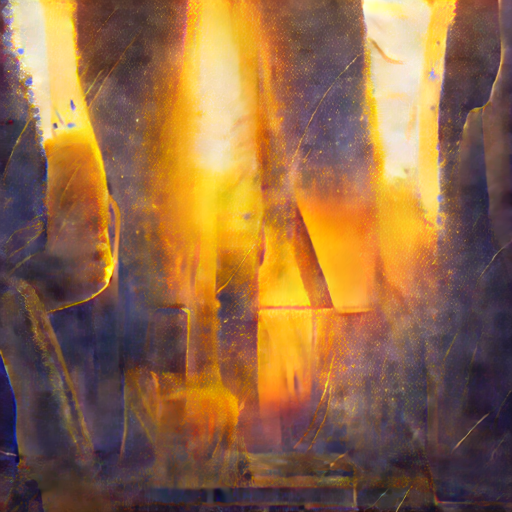

нарядная новогодняя елка, красивые игрушки, звезда сверху, огоньки, на тёмном фоне


In [21]:
image_embeddings_transformed = x
prompt_attention_mask = torch.ones(image_embeddings_transformed.shape[0], image_embeddings_transformed.shape[1])
print(prompt_attention_mask.shape)
image_embeddings_transformed = image_embeddings_transformed.to("cuda")
prompt_attention_mask =prompt_attention_mask.to("cuda")
image = pipe(
    prompt_embeds = image_embeddings_transformed,
    prompt_attention_mask = prompt_attention_mask,
    #negative_prompt = "",
    generator=generator,
)[0]

for img in image:
    img.show()
    print(prompt)

In [6]:
import torch
import torch.nn.functional as F
from urllib.request import urlopen
from PIL import Image
from open_clip import create_model_from_pretrained, get_tokenizer # works on open-clip-torch>=2.23.0, timm>=0.9.8

model, preprocess = create_model_from_pretrained('hf-hub:timm/ViT-SO400M-14-SigLIP-384')
tokenizer = get_tokenizer('hf-hub:timm/ViT-SO400M-14-SigLIP-384')

image = Image.open(urlopen(
    'https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/beignets-task-guide.png'
))
image = preprocess(image).unsqueeze(0)

labels_list = ["a dog", "a cat", "a donut", "a beignet"]
text = tokenizer(labels_list, context_length=model.context_length)

with torch.no_grad(), torch.cuda.amp.autocast():
    image_features = model.encode_image(image)
    print(image_features.shape)
    print(image_features)
    text_features = model.encode_text(text)
    image_features = F.normalize(image_features, dim=-1)
    text_features = F.normalize(text_features, dim=-1)

    text_probs = torch.sigmoid(image_features @ text_features.T * model.logit_scale.exp() + model.logit_bias)

zipped_list = list(zip(labels_list, [round(p.item(), 3) for p in text_probs[0]]))
print("Label probabilities: ", zipped_list)

with torch.no_grad(), torch.cuda.amp.autocast():
    # Получаем скрытые состояния всех патчей
    outputs = model.visual(image)  # [batch_size, num_patches + 1, hidden_dim]
    print("All patches shape:", outputs.shape)  # Пример: [1, 256, 1152]
    #all_patch_embeddings = outputs[:, 1:, :]  # Игнорируем [CLS]-токен
    #print("All patches shape:", all_patch_embeddings.shape)  # Пример: [1, 256, 1152]


/tmp/ipykernel_19418/3674156061.py:18: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast():


torch.Size([1, 1152])
tensor([[-0.0550,  0.1304,  0.1885,  ..., -0.1434, -0.4676,  0.1461]])
Label probabilities:  [('a dog', 0.0), ('a cat', 0.0), ('a donut', 0.0), ('a beignet', 0.517)]


/tmp/ipykernel_19418/3674156061.py:31: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast():


All patches shape: torch.Size([1, 1152])


In [7]:
with torch.no_grad(), torch.cuda.amp.autocast():
    # Извлекаем патчи и позиционные эмбеддинги
    x = model.visual.patch_embed(image)  # [1, num_patches, 1152]
    x = model.visual.pos_drop(x + model.visual.pos_embed)
    
    # Проход через трансформерные блоки
    for blk in model.visual.blocks:
        x = blk(x)
    
    # Применяем LayerNorm (если есть)
    if hasattr(model.visual, "norm"):
        x = model.visual.norm(x)
    
    # Теперь x содержит все патчи
    print("All patches shape:", x.shape)
    # Пример вывода: torch.Size([1, 756, 1152])

/tmp/ipykernel_19418/2526917774.py:1: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast():


AttributeError: 'TimmModel' object has no attribute 'patch_embed'